# Prediksi Harga Rumah dengan Regresi Linear
Model machine learning untuk memprediksi harga rumah di King County, USA menggunakan regresi linier.

In [1]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import joblib

## Load Dataset

In [2]:
df = pd.read_csv('kc_house_data.csv')
print(df.info())
print(df.describe())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

## Preprocessing

In [3]:
# Cek nilai kosong
print(df.isnull().sum())

# Hapus kolom tidak relevan
df = df.drop(['id', 'date'], axis=1)

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


## Korelasi Fitur

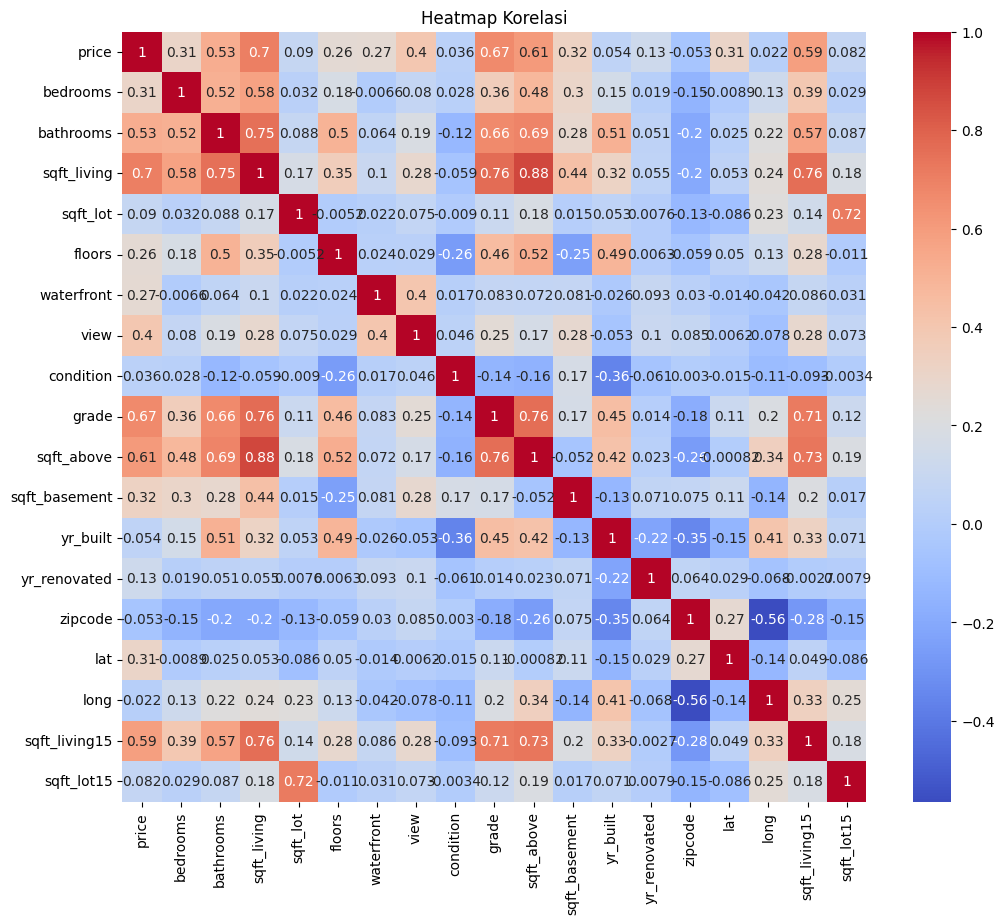

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi')
plt.show()

## Split Dataset

In [5]:
X = df.drop('price', axis=1)
# y = df['price']
# features = ['sqft_living', 'grade', 'bathrooms', 'sqft_above', 'sqft_living15']

# X = df[features]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Scaling

In [6]:
# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Latih Model Regresi Linear

In [7]:
from sklearn.ensemble import RandomForestRegressor
# model = RandomForestRegressor()
model = LinearRegression()

model.fit(X_train_scaled, y_train)

LinearRegression()

## Evaluasi Model

In [8]:
y_pred = model.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R^2 Score: {r2:.4f}")

MAE: 127567.93
MSE: 45172503545.54
R^2 Score: 0.7012


## Simpan Model

In [19]:
# Simpan model ke file .pkl
joblib.dump(model, 'regresi_linear_model.pkl')

['regresi_linear_model.pkl']